Problem Statement
Customer Churn is a burning problem for Telecom companies. Almost every telecom company pays a premium to get a customer on-board. Customer churn is a directly impacts company’s revenue.

In this case-study, we simulate one such case of customer churn where we work on a data of post-paid customers with a contract. The data has information about customer usage behaviour, contract details, and payment details. The data also indicates which were the customers who cancelled their service.

Based on this past data, Perform an EDA and build a model which can predict whether a customer will cancel their service in the future or not.

2. Data Dictionary
Churn - 1 if customer cancelled service, 0 if not
AccountWeeks - number of weeks customer has had active account
ContractRenewal - 1 if customer recently renewed contract, 0 if not
DataPlan - 1 if customer has data plan, 0 if not
DataUsage - gigabytes of monthly data usage
CustServCalls - number of calls into customer service
DayMins - average daytime minutes per month
DayCalls - average number of daytime calls
MonthlyCharge - average monthly bill
OverageFee - largest overage fee in last 12 months
RoamMins - average number of roaming minutes

In [1]:
#Import all necessary modules
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import scale

In [2]:
cell_df=pd.read_excel('D:/Ment Class/Practise11/Excel Data/TSF/PowerBI/DWNLDS/CV/MRA Project/MRA Project/XLSX File for practice/cell_df.xlsx')

In [3]:
cell_df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,1,108.0,0.0,0.0,0.38,2.0,115.1,114.0,41.8,10.57,13.8
1,0,113.0,1.0,1.0,3.59,1.0,44.9,63.0,55.9,6.71,13.3
2,0,101.0,1.0,0.0,0.00,0.0,257.3,84.0,60.0,9.24,13.5
3,0,80.0,1.0,1.0,2.89,4.0,166.4,92.0,77.9,11.92,10.7
4,0,70.0,1.0,0.0,0.00,0.0,175.4,130.0,44.0,7.98,11.6


In [4]:
cell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3303 non-null   float64
 2   ContractRenewal  3315 non-null   float64
 3   DataPlan         3324 non-null   float64
 4   DataUsage        3317 non-null   float64
 5   CustServCalls    3281 non-null   float64
 6   DayMins          3298 non-null   float64
 7   DayCalls         3322 non-null   float64
 8   MonthlyCharge    3320 non-null   float64
 9   OverageFee       3309 non-null   float64
 10  RoamMins         3326 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 286.6 KB


In [5]:
cell_df[['AccountWeeks','DataUsage','CustServCalls','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins']].describe()

,AccountWeeks,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3303.000000,3317.000000,3281.000000,3298.000000,3322.000000,3320.000000,3309.000000,3326.000000
mean,101.159552,0.814827,1.563852,179.863069,100.434377,56.288735,10.048598,10.237974
std,39.879736,1.270329,1.318590,54.581440,20.079248,16.438343,2.539063,2.793192
min,1.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,74.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,101.000000,0.000000,1.000000,179.600000,101.000000,53.500000,10.070000,10.300000
75%,127.000000,1.780000,2.000000,216.700000,114.000000,66.125000,11.770000,12.100000
max,243.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [6]:
cell_df.isnull().sum()

Churn               0
AccountWeeks       30
ContractRenewal    18
DataPlan            9
DataUsage          16
CustServCalls      52
DayMins            35
DayCalls           11
MonthlyCharge      13
OverageFee         24
RoamMins            7
dtype: int64

In [7]:
cols = ['ContractRenewal','DataPlan']
for column in cols:
    print(column)
    mode_1 = cell_df[column].mode()[0]
    print(mode_1)
    cell_df[column].fillna(value=mode_1,inplace=True)
    
cell_df.isnull().sum()

ContractRenewal
1.0
DataPlan
0.0


Churn               0
AccountWeeks       30
ContractRenewal     0
DataPlan            0
DataUsage          16
CustServCalls      52
DayMins            35
DayCalls           11
MonthlyCharge      13
OverageFee         24
RoamMins            7
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
SI = SimpleImputer(strategy='median')

In [10]:
cell_df = pd.DataFrame(SI.fit_transform(cell_df),columns=cell_df.columns)

In [11]:
cell_df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,1.0,108.0,0.0,0.0,0.38,2.0,115.1,114.0,41.8,10.57,13.8
1,0.0,113.0,1.0,1.0,3.59,1.0,44.9,63.0,55.9,6.71,13.3
2,0.0,101.0,1.0,0.0,0.00,0.0,257.3,84.0,60.0,9.24,13.5
3,0.0,80.0,1.0,1.0,2.89,4.0,166.4,92.0,77.9,11.92,10.7
4,0.0,70.0,1.0,0.0,0.00,0.0,175.4,130.0,44.0,7.98,11.6


In [12]:
cell_df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [13]:
# Are there any duplicates ?
dups = cell_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


In [14]:
cell_df.Churn.value_counts(normalize=True)

0.0    0.855086
1.0    0.144914
Name: Churn, dtype: float64

In [15]:
from pylab import rcParams

In [16]:
rcParams['figure.figsize'] = 15,8

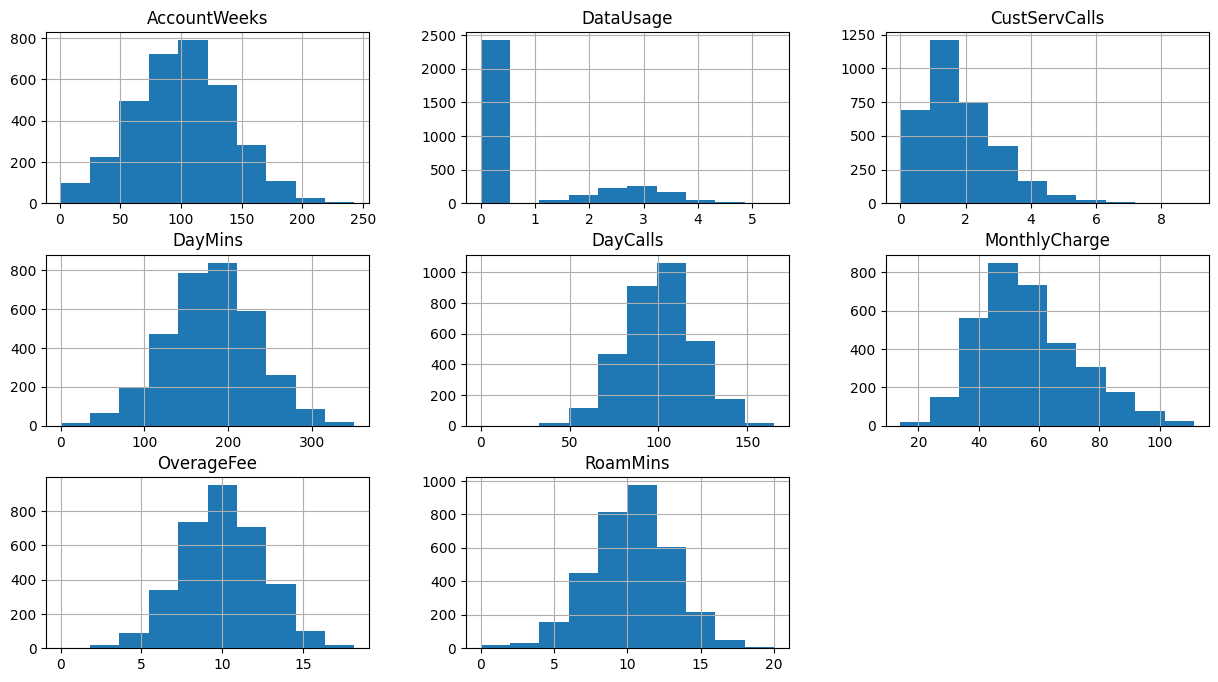

In [17]:
cell_df[['AccountWeeks','DataUsage','CustServCalls','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins']].hist();

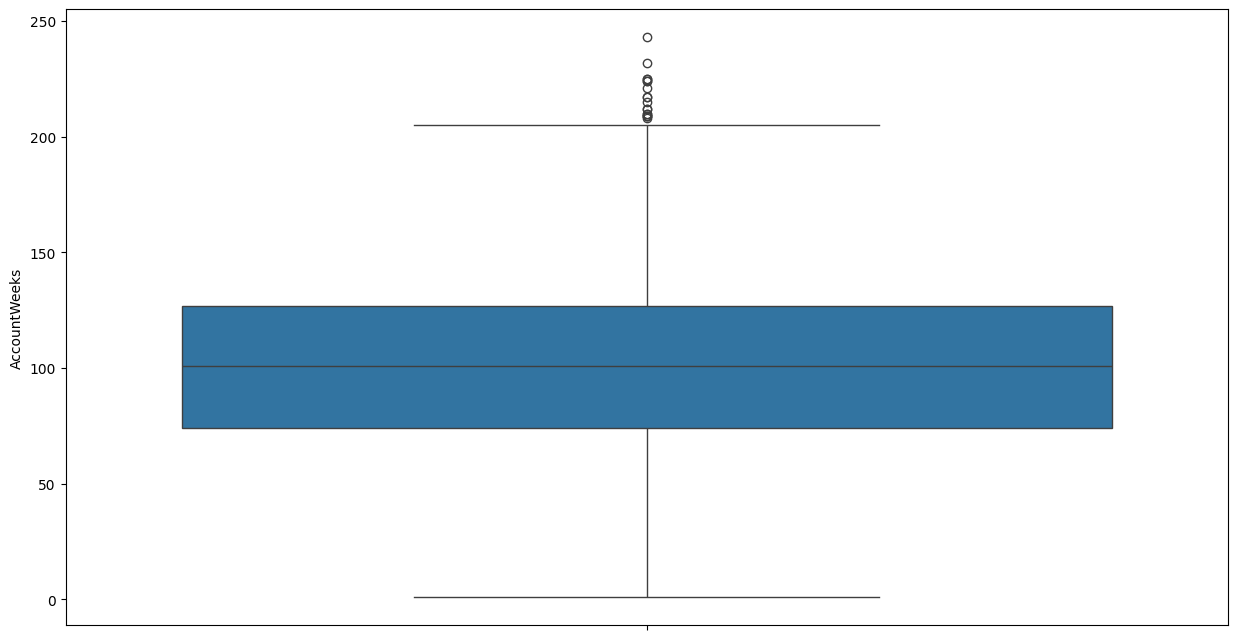

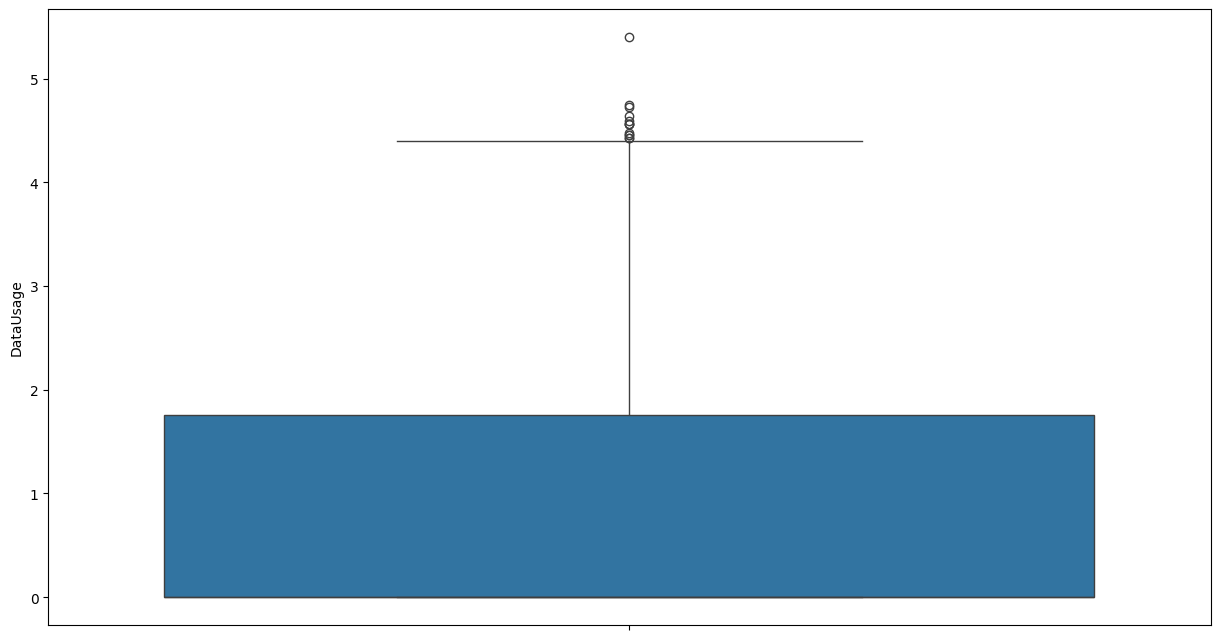

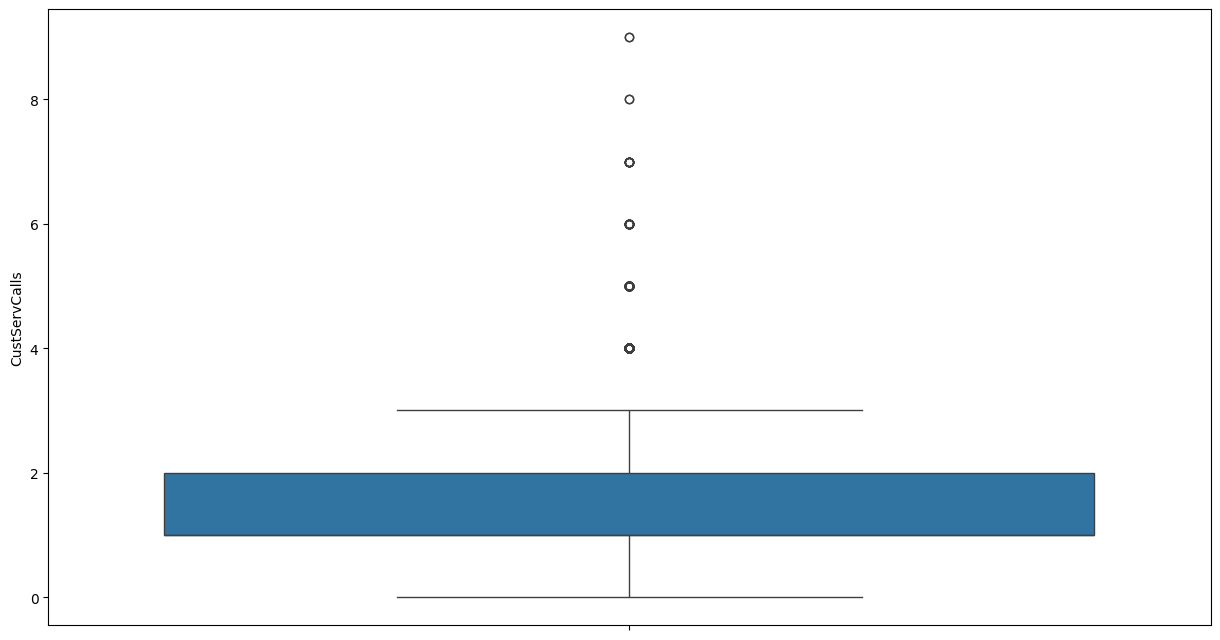

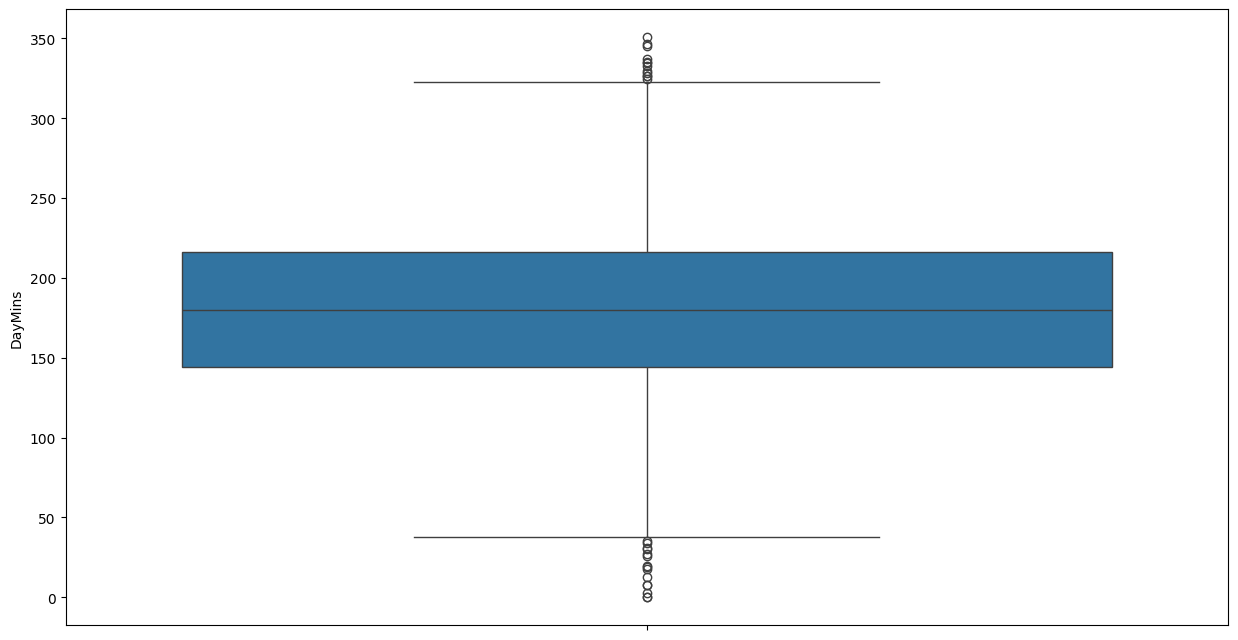

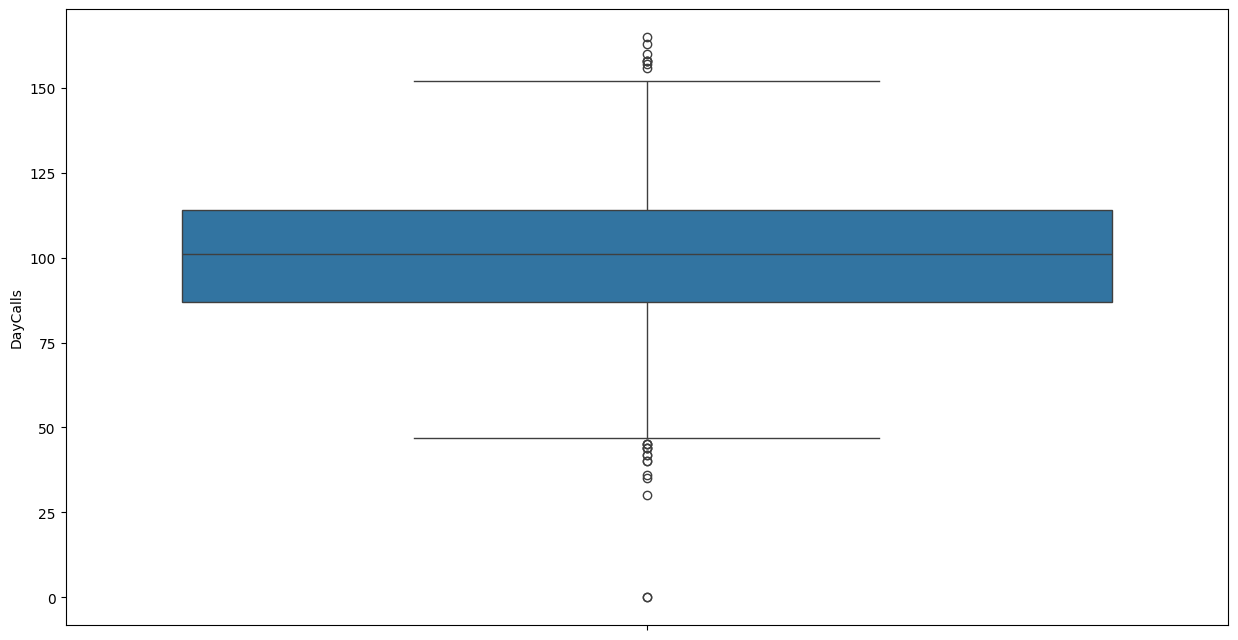

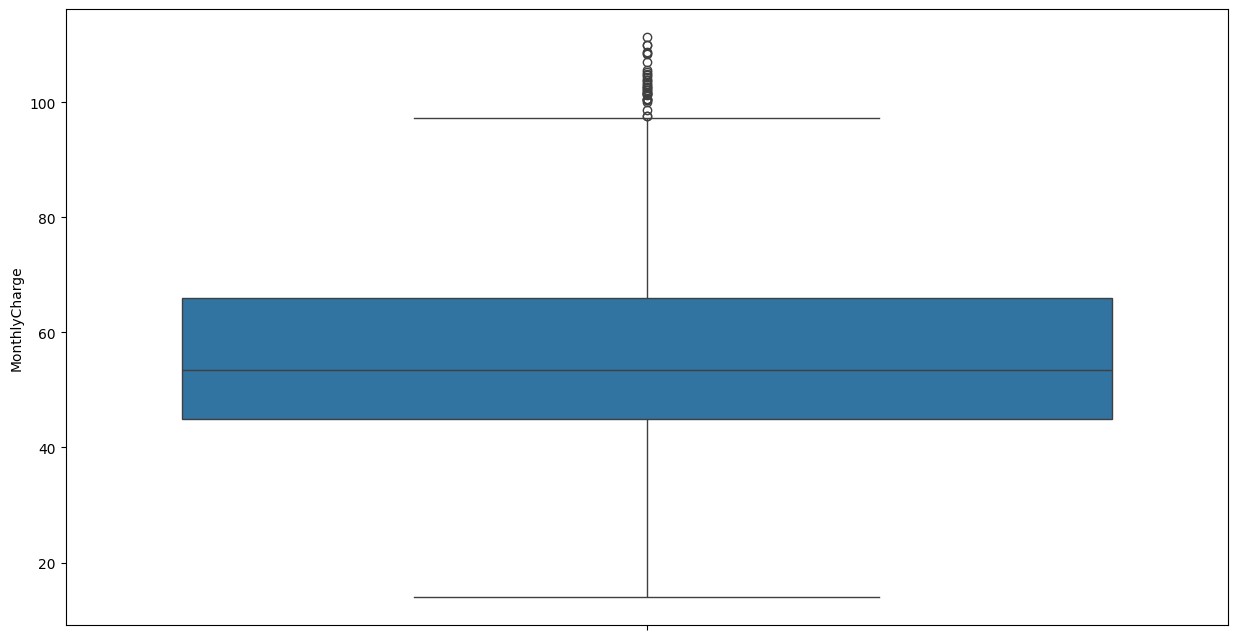

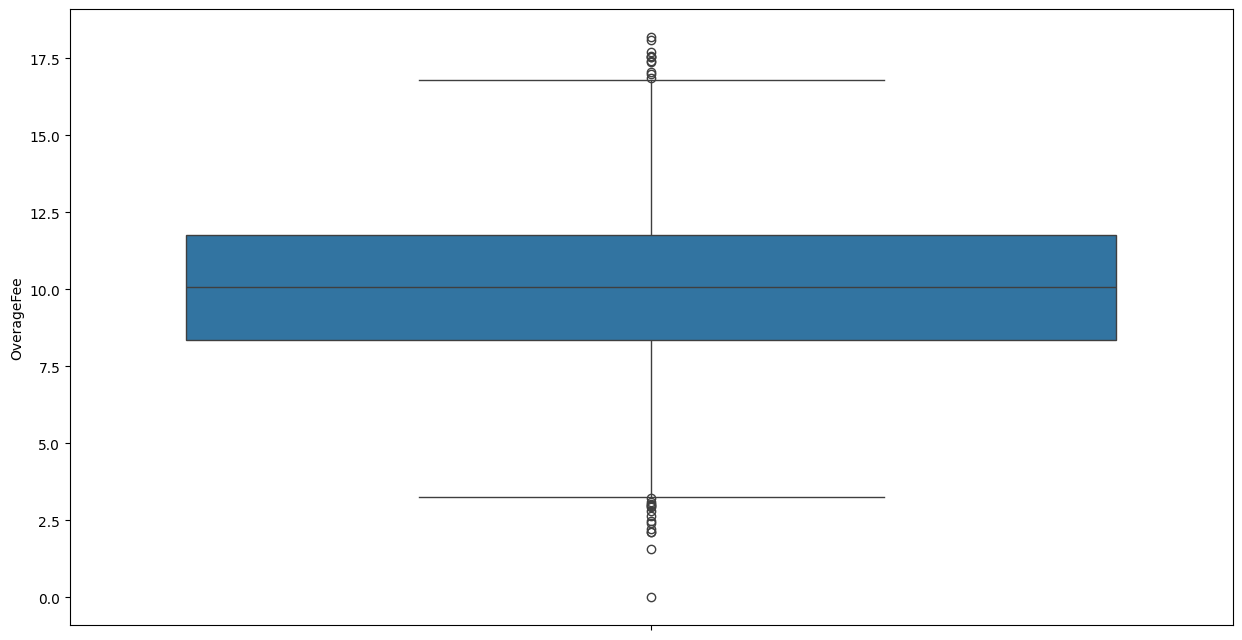

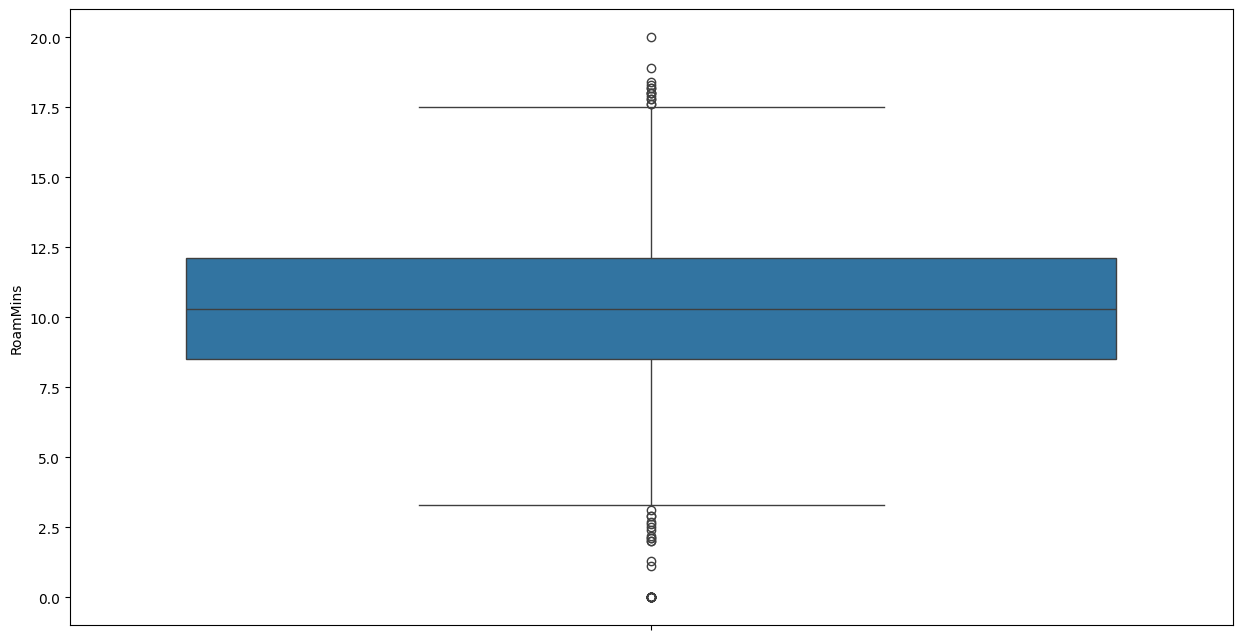

In [18]:
cols=['AccountWeeks','DataUsage','CustServCalls','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins'];

for i in cols:
    sns.boxplot(cell_df[i])
    plt.show()


Although outliers exists as per the boxplot, by looking at the data distribution in describe(), the values are not too far away. Treating the outliers by converting them to min/max values will cause most variables to have values to be the same. So, outliers are not treated in this case

2.1.7. Bi-Variate Analysis with Target variable
Account Weeks and Churn



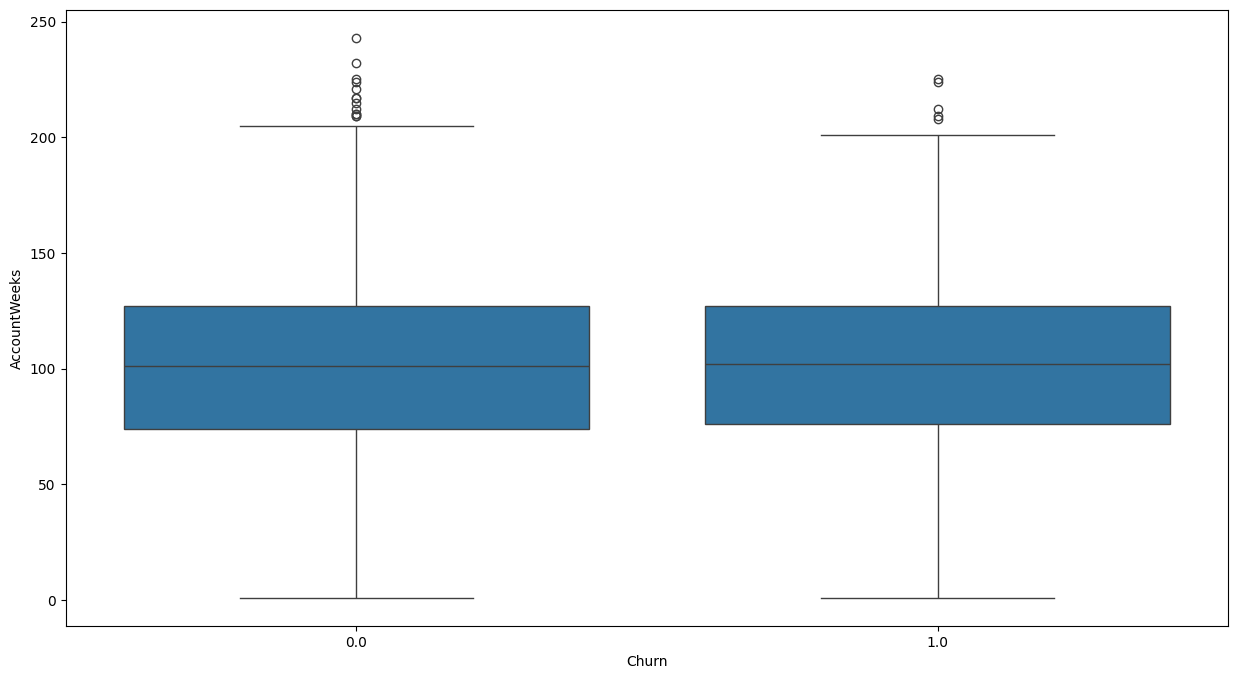

In [19]:
sns.boxplot(x=cell_df['Churn'],y=cell_df['AccountWeeks']);

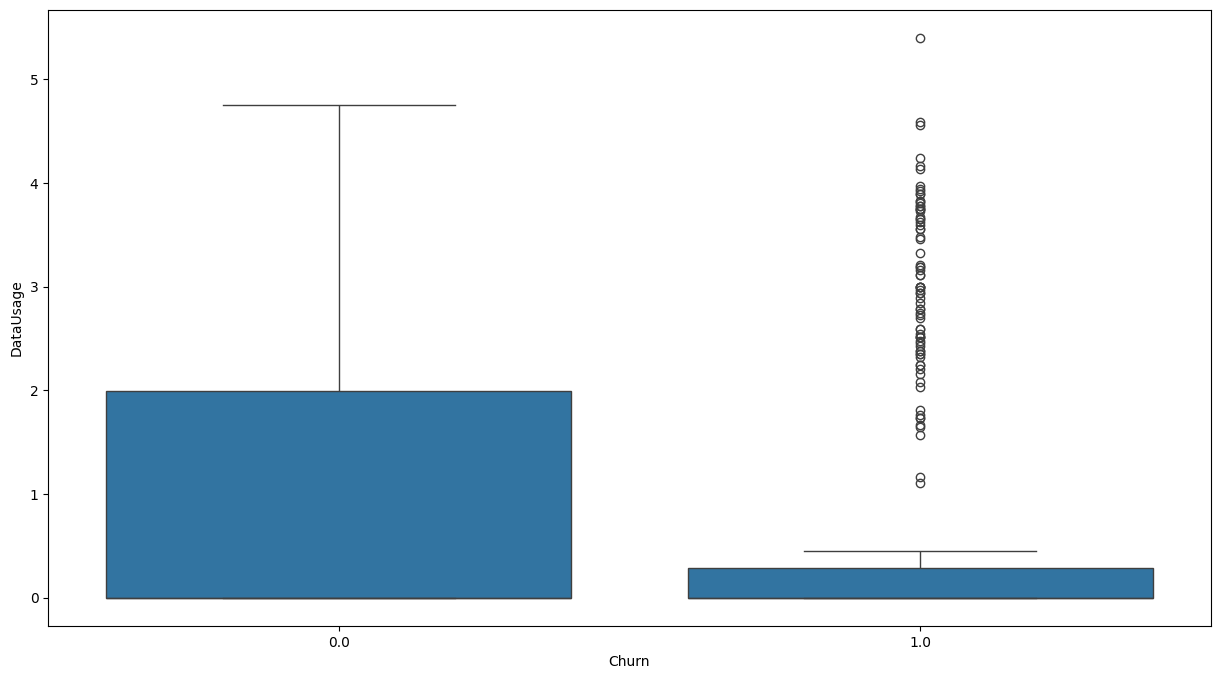

In [20]:
sns.boxplot(x=cell_df['Churn'],y=cell_df['DataUsage']);

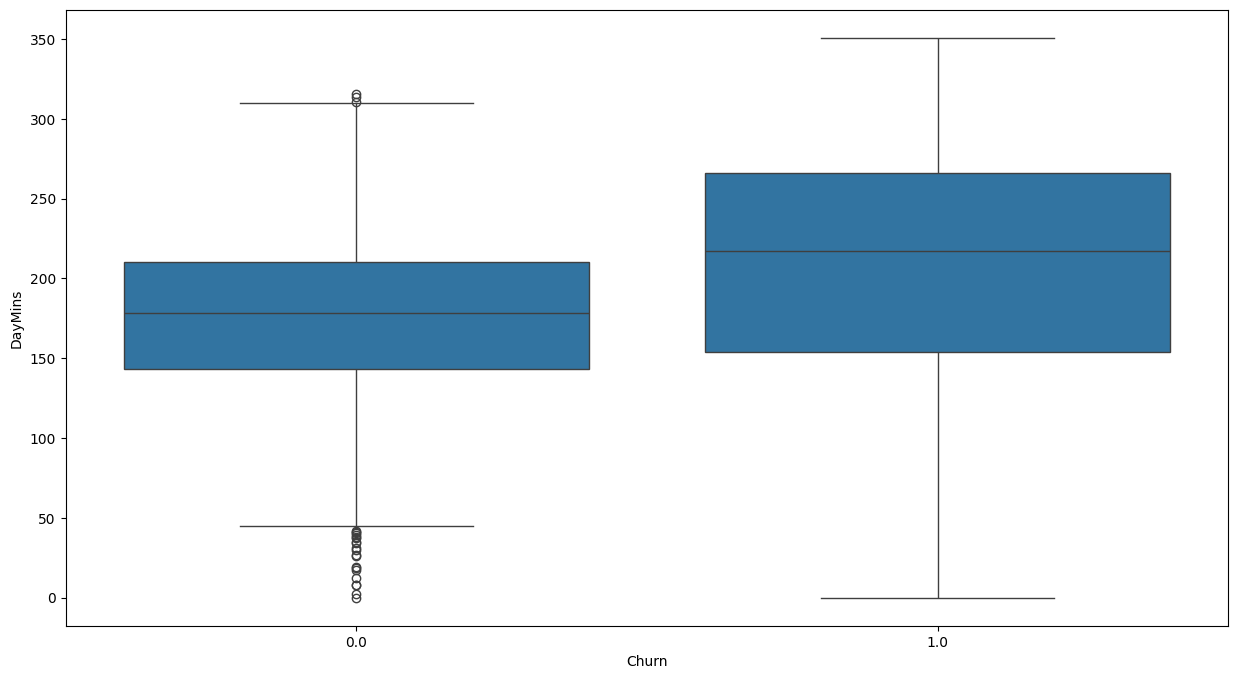

In [21]:
sns.boxplot(x=cell_df['Churn'],y=cell_df['DayMins']);

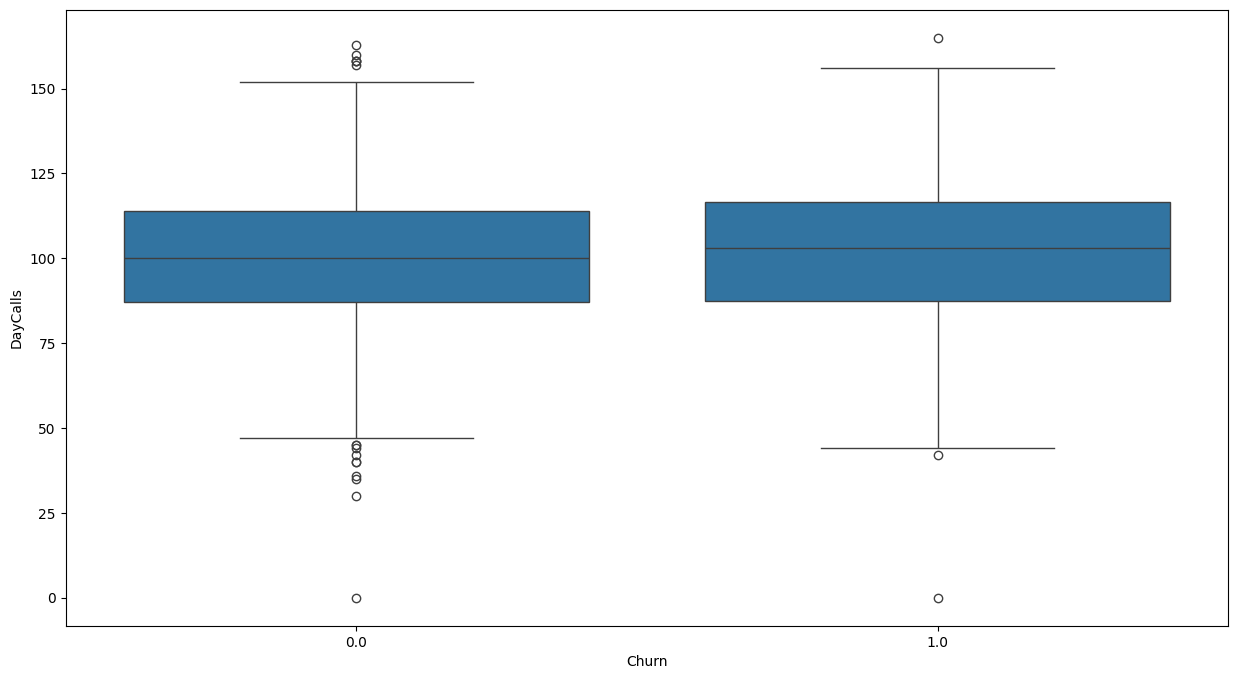

In [22]:
sns.boxplot(x=cell_df['Churn'],y=cell_df['DayCalls']);

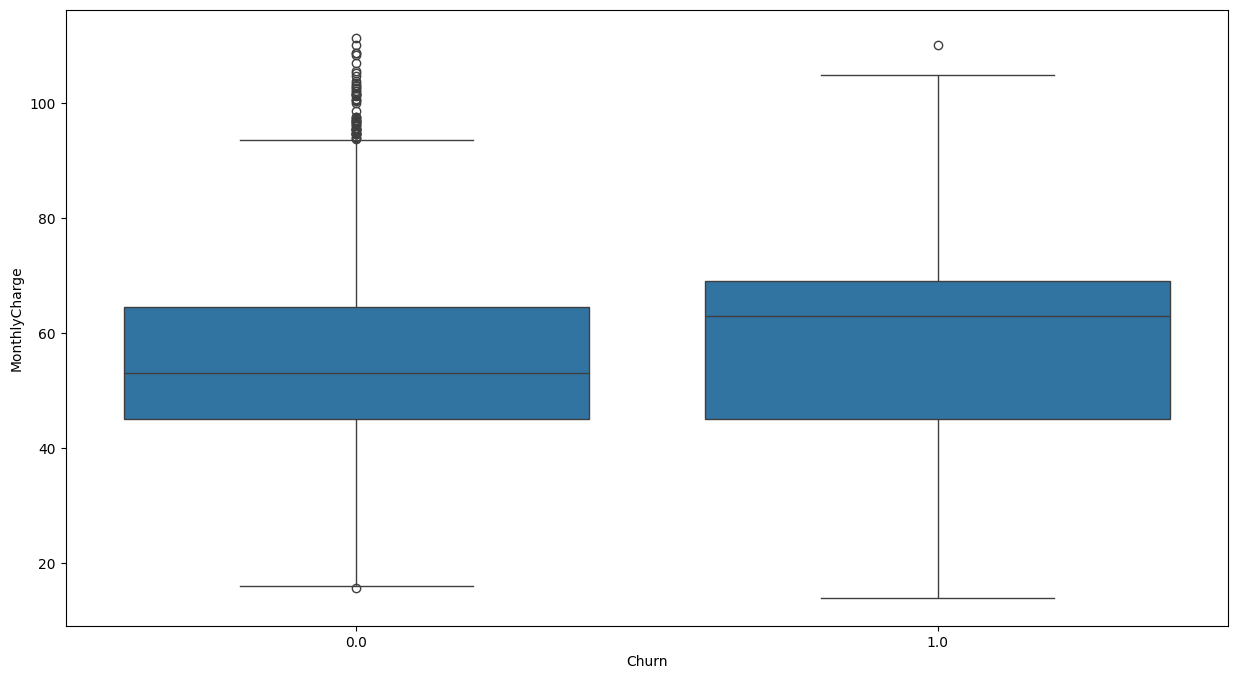

In [23]:
sns.boxplot(x=cell_df['Churn'],y=cell_df['MonthlyCharge']);

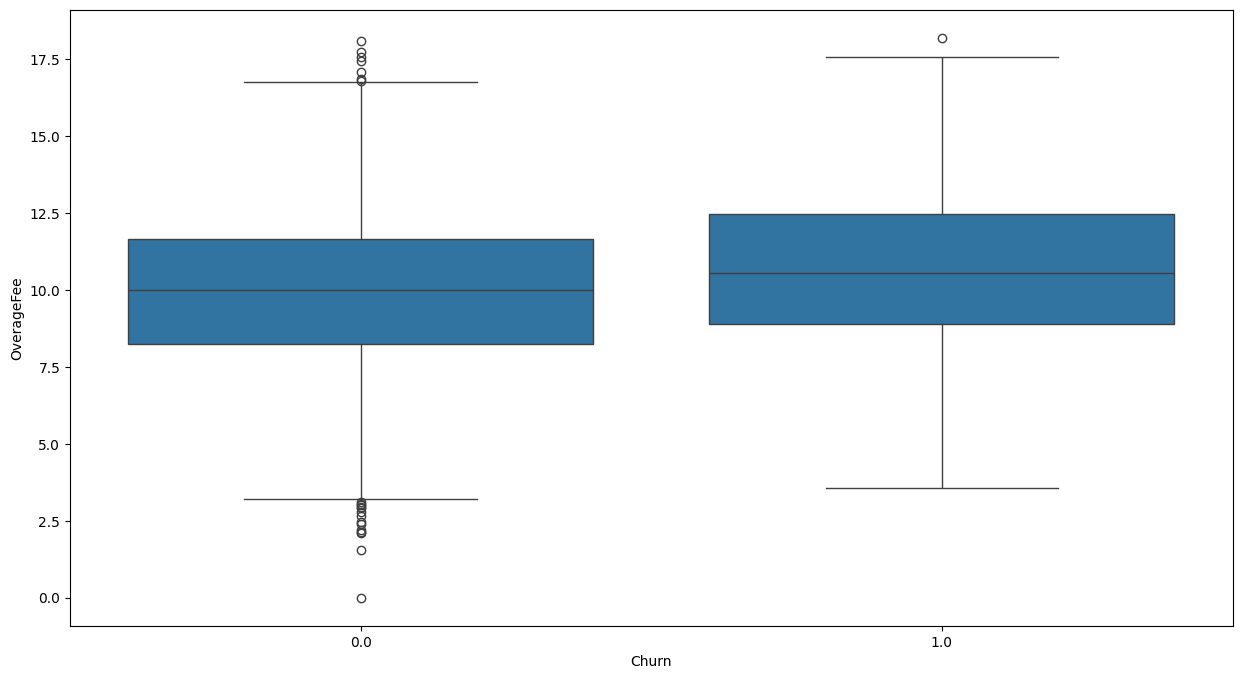

In [24]:
sns.boxplot(x=cell_df['Churn'],y=cell_df['OverageFee']);

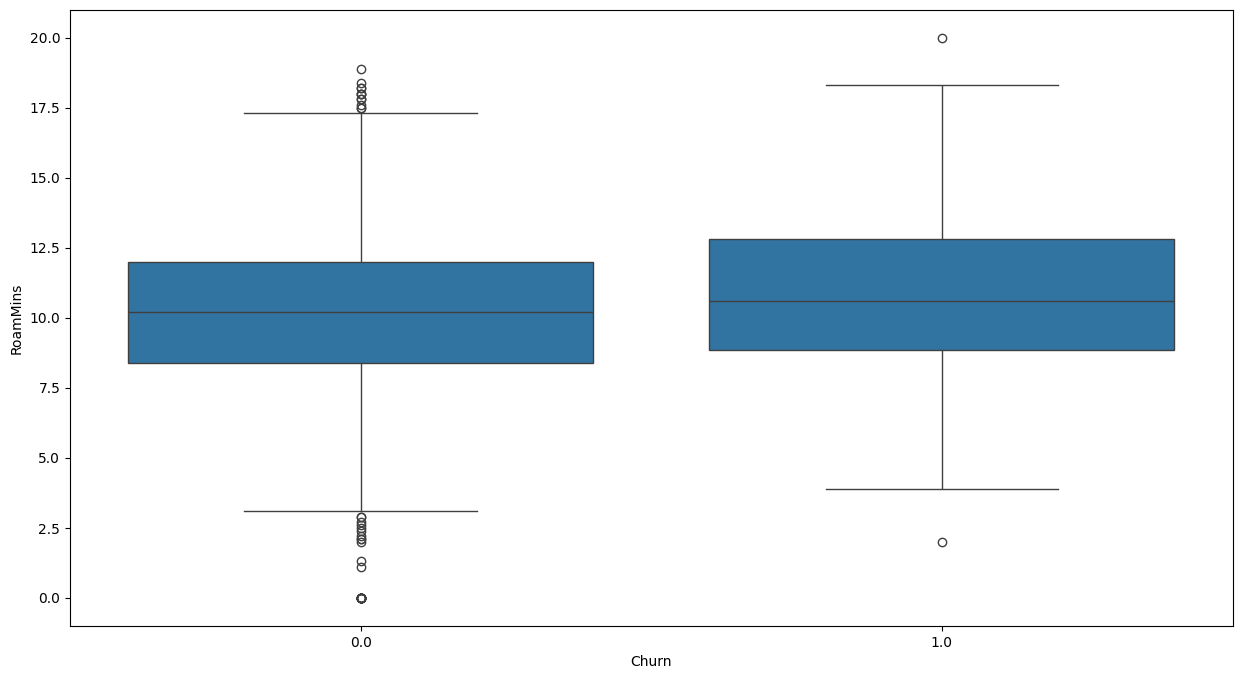

In [25]:
sns.boxplot(x=cell_df['Churn'],y=cell_df['RoamMins']);

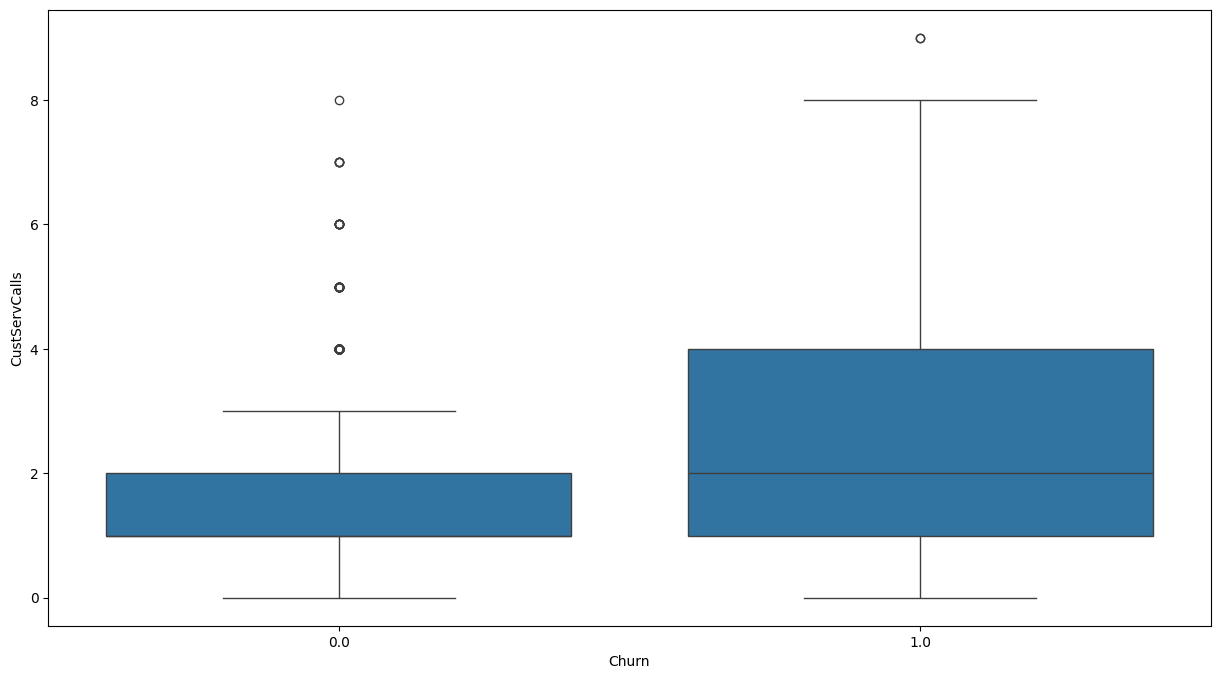

In [26]:
sns.boxplot(x=cell_df['Churn'],y=cell_df['CustServCalls']);

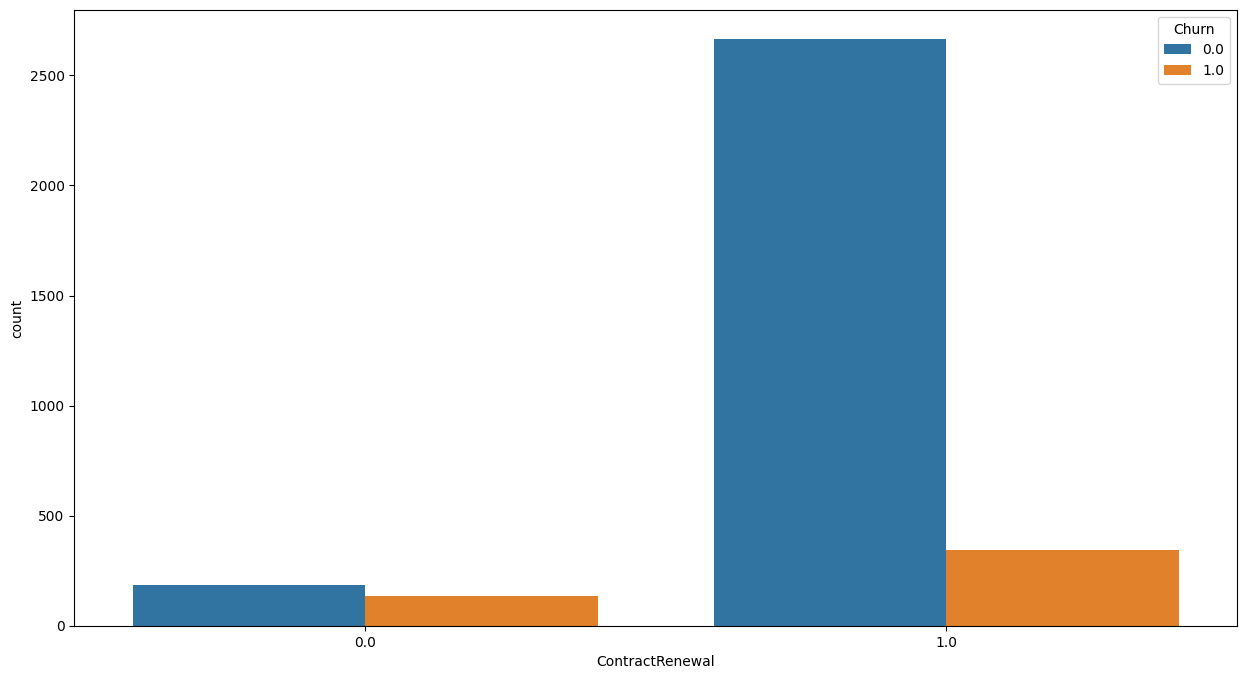

In [27]:
sns.countplot(x=cell_df['ContractRenewal'],hue=cell_df['Churn']);

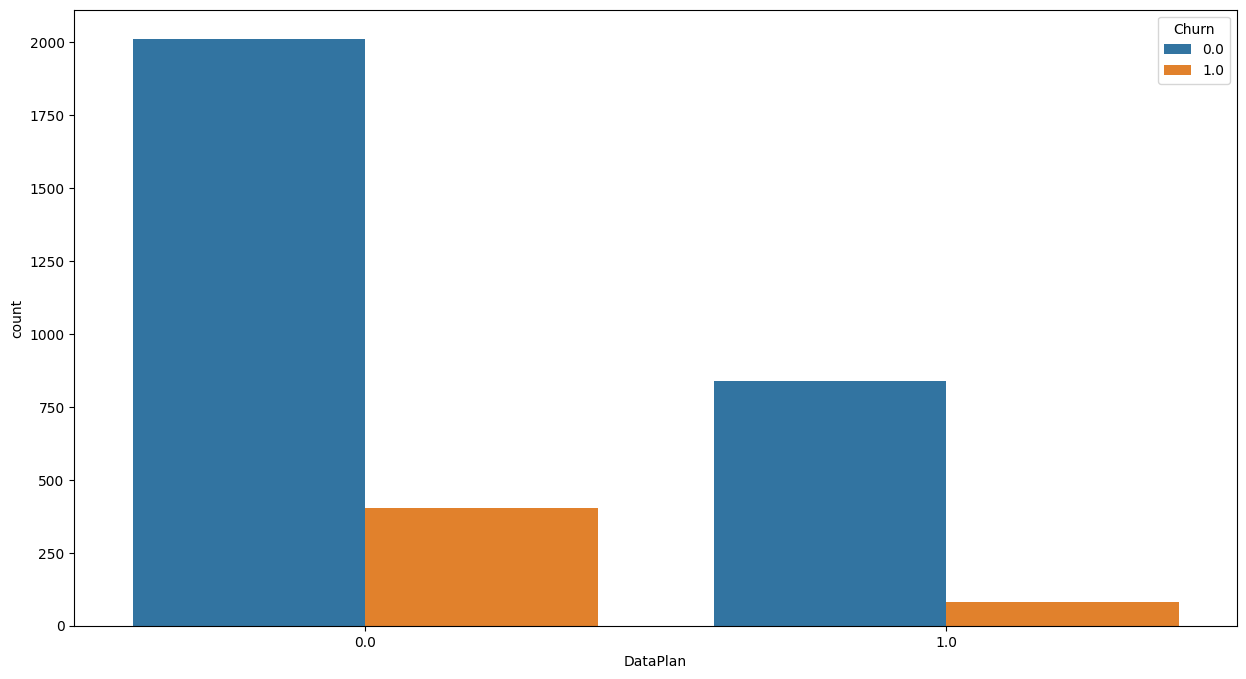

In [28]:
sns.countplot(x=cell_df['DataPlan'],hue=cell_df['Churn']);
# pd.crosstab(cell_df['DataPlan'],cell_df['Churn']).plot(kind='bar');

In [29]:
# Creating a copy of the original data frame
df = cell_df.copy()

In [30]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,1.0,108.0,0.0,0.0,0.38,2.0,115.1,114.0,41.8,10.57,13.8
1,0.0,113.0,1.0,1.0,3.59,1.0,44.9,63.0,55.9,6.71,13.3
2,0.0,101.0,1.0,0.0,0.00,0.0,257.3,84.0,60.0,9.24,13.5
3,0.0,80.0,1.0,1.0,2.89,4.0,166.4,92.0,77.9,11.92,10.7
4,0.0,70.0,1.0,0.0,0.00,0.0,175.4,130.0,44.0,7.98,11.6


In [31]:
X = df.drop('Churn',axis=1)
Y = df.pop('Churn')

In [32]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [33]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (2333, 10)
Number of rows and columns of the training set for the dependent variable: (2333,)
Number of rows and columns of the test set for the independent variables: (1000, 10)
Number of rows and columns of the test set for the dependent variable: (1000,)


In [34]:
from sklearn.preprocessing import StandardScaler
stand_scal = StandardScaler()
X_train = stand_scal.fit_transform(X_train)
X_test = stand_scal.transform (X_test)

In [35]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

In [36]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

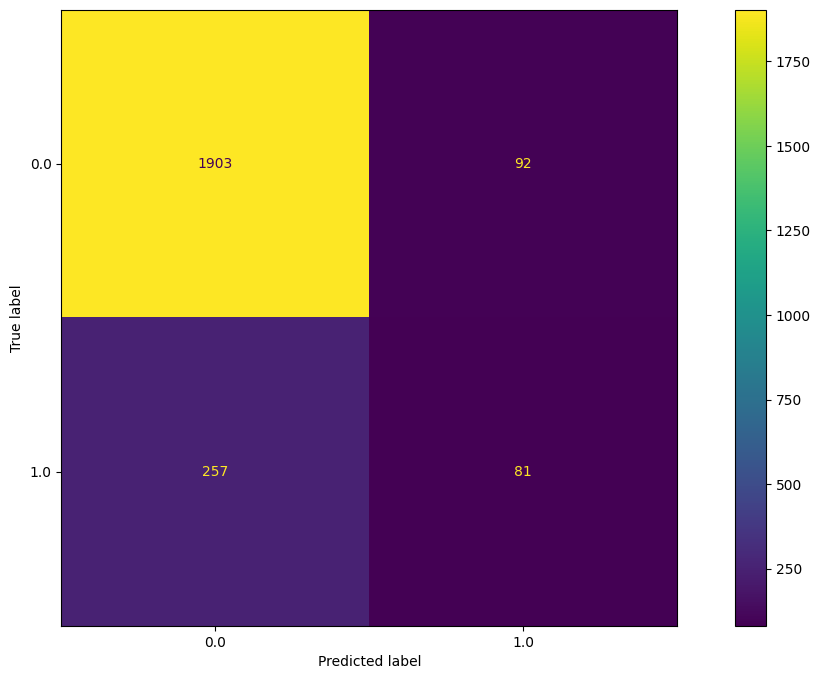

In [37]:
## Confusion matrix on the training data
cm = confusion_matrix(Y_train, pred_class_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

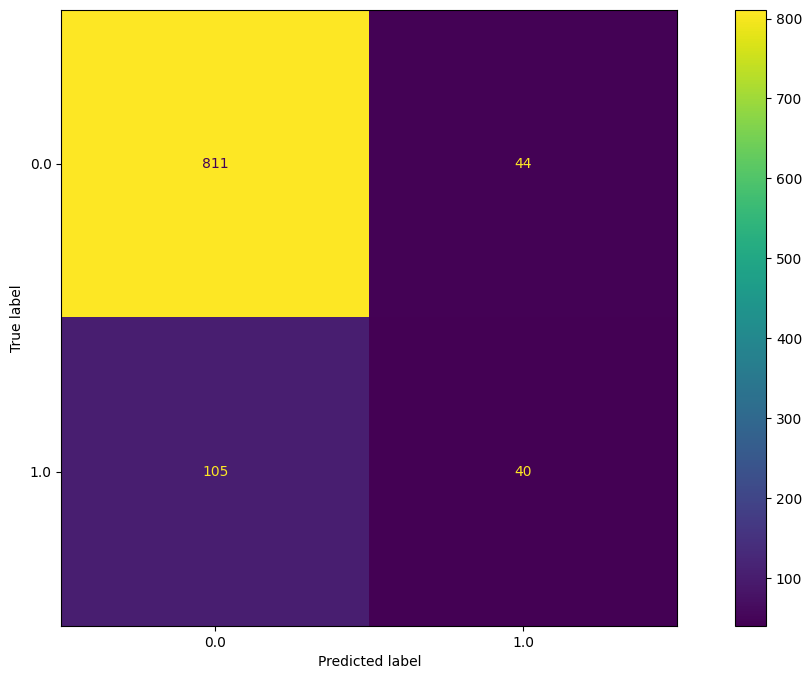

In [38]:
## Confusion matrix on the training data
cm = confusion_matrix(Y_test, pred_class_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [39]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.88      0.95      0.92      1995
         1.0       0.47      0.24      0.32       338

    accuracy                           0.85      2333
   macro avg       0.67      0.60      0.62      2333
weighted avg       0.82      0.85      0.83      2333
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       855
         1.0       0.48      0.28      0.35       145

    accuracy                           0.85      1000
   macro avg       0.68      0.61      0.63      1000
weighted avg       0.83      0.85      0.83      1000
 



In [40]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.820
AUC for the Test Data: 0.829


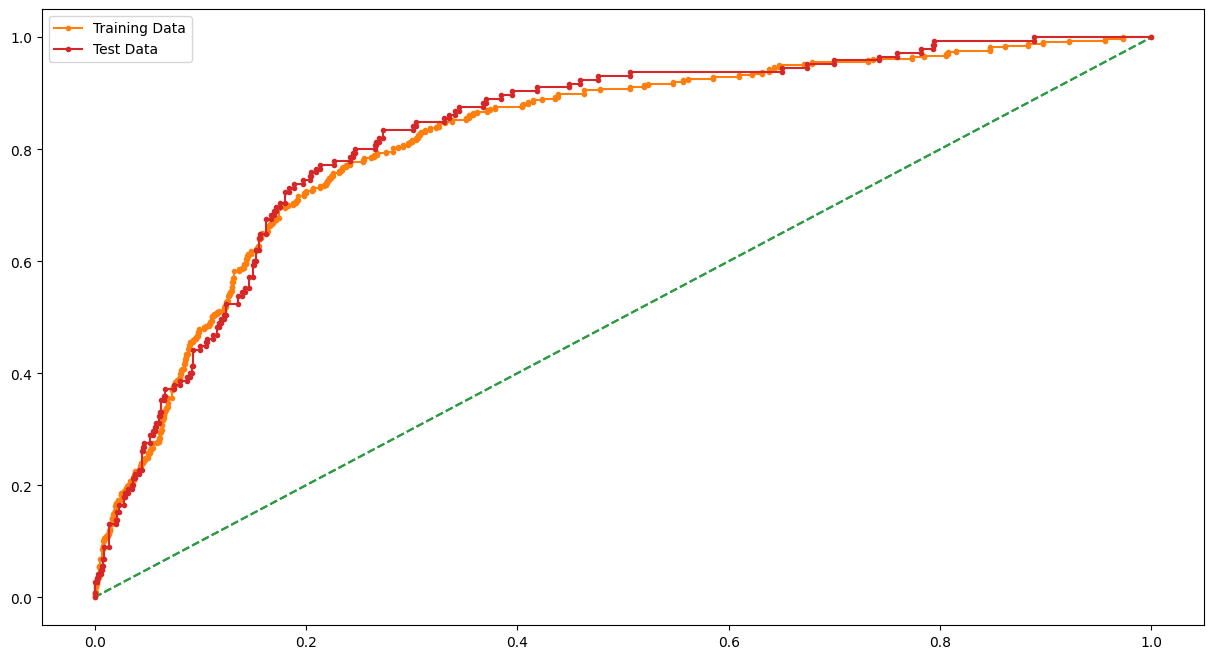

In [41]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [42]:
pred_prob_train[:,1]

array([0.02069932, 0.20179416, 0.15422548, ..., 0.10058096, 0.16733976,
       0.0528347 ])

In [43]:
#intercept value
clf.intercept_ 

array([-2.37504846])

In [44]:
#coefficients for the Linear Discriminant Function
clf.coef_

array([[-0.0016027 , -0.87558073, -0.29525062, -0.31084048,  0.7657377 ,
         0.47806798,  0.04872382,  0.29382077,  0.23943236,  0.18057541]])

In [45]:
X.columns

Index(['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [46]:
a=clf.coef_
np.round(a,2) # rounded up coefficients 

array([[-0.  , -0.88, -0.3 , -0.31,  0.77,  0.48,  0.05,  0.29,  0.24,
         0.18]])

In [47]:
lda_model = LinearDiscriminantAnalysis(n_components = 1)# as only two classes are there for prediction thus 2-1=1 component
X_train_lda = lda_model.fit_transform(X_train, Y_train)
X_test_lda = lda_model.transform(X_test)

In [48]:
print(X_train_lda.shape)
print(X_test_lda.shape)

(2333, 1)
(1000, 1)


In [49]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_lda, Y_train)
y_pred = model.predict(X_test_lda)


In [50]:
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,y_pred),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       855
         1.0       0.50      0.19      0.27       145

    accuracy                           0.85      1000
   macro avg       0.69      0.58      0.60      1000
weighted avg       0.82      0.85      0.83      1000
 

